In [1]:
import keras
import tensorflow as tf

Using TensorFlow backend.


In [2]:
from tensorflow.keras.datasets import mnist

In [5]:
(train_images, train_labels),(test_images, test_labels)  = mnist.load_data()

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
test_labels.shape

(10000,)

In [10]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### 시각화 

In [11]:
import matplotlib.pyplot as plt 

In [12]:
d = train_images[4]

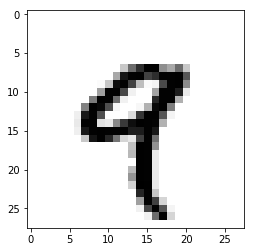

In [13]:
plt.imshow(d, cmap=plt.cm.binary)
plt.show()

In [14]:
train_labels[4]

9

In [15]:
d.max()

255

In [16]:
d.min()

0

### 신경망 작성

In [18]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [19]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu'
                         , input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [20]:
network.compile(optimizer='rmsprop', 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

### X값 변형 

In [21]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

In [22]:
train_images.shape

(60000, 784)

In [23]:
test_images.shape

(10000, 784)

In [24]:
train_images.min()

0.0

In [25]:
train_images.max()

1.0

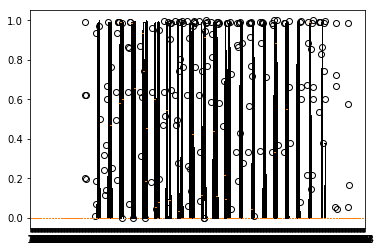

In [26]:
plt.boxplot(train_images[0:5])
plt.show()

### Y값 변환 

In [28]:
from tensorflow.keras.utils import to_categorical   #one-hot 

In [29]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [30]:
train_labels.shape

(60000, 10)

In [31]:
test_labels.shape

(10000, 10)

### 학습

In [35]:
network.fit(train_images, train_labels
            , epochs=5, batch_size=128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 46us/step - loss: 0.0276 - acc: 0.9916 - val_loss: 0.0295 - val_acc: 0.9901
Epoch 2/5
48000/48000 [==============================] - 3s 63us/step - loss: 0.0208 - acc: 0.9940 - val_loss: 0.0341 - val_acc: 0.9897
Epoch 3/5
48000/48000 [==============================] - 3s 59us/step - loss: 0.0160 - acc: 0.9955 - val_loss: 0.0302 - val_acc: 0.9909
Epoch 4/5
48000/48000 [==============================] - 3s 62us/step - loss: 0.0121 - acc: 0.9965 - val_loss: 0.0479 - val_acc: 0.9861
Epoch 5/5
48000/48000 [==============================] - 3s 62us/step - loss: 0.0084 - acc: 0.9978 - val_loss: 0.0420 - val_acc: 0.9874


In [36]:
network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 89us/step


[0.0775091127547872, 0.9799]

In [37]:
network.metrics_names

['loss', 'acc']